# Signal processing course 2018/2019-1 @ ELTE
# Assignment 2 - Part 2
## 10.01.2018

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as random

## Task 4

## Task 5

## Task 6

### Amplitude and phase sectrum

#### Function 1

In [44]:
def f_1_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/3) ** ((t/SampRate) * i) * u * (((t/SampRate) * i) - 1)
        i += 1
    
    return(signal, time)

In [45]:
u_1_spectrum = np.random.random() * 10
t_1_spectrum = 15

signal_spectrum_1, time_spectrum_1 = f_1_spectrum(u_1_spectrum, t_1_spectrum)

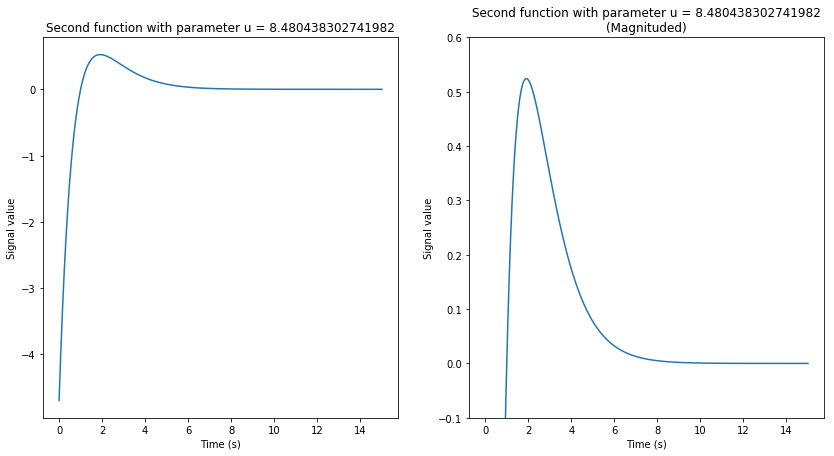

In [136]:
fig_f_1_spectrum, axes_f_1_spectrum = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axes_f_1_spectrum[0].plot(time_spectrum_1, signal_spectrum_1)
axes_f_1_spectrum[0].set_title("Second function with parameter u = " + str(u_2_spectrum))
axes_f_1_spectrum[0].set_xlabel("Time (s)")
axes_f_1_spectrum[0].set_ylabel("Signal value")

axes_f_1_spectrum[1].plot(time_spectrum_1, signal_spectrum_1)
axes_f_1_spectrum[1].set_title("Second function with parameter u = " + str(u_2_spectrum) + "\n(Magnituded)")
axes_f_1_spectrum[1].set_xlabel("Time (s)")
axes_f_1_spectrum[1].set_ylabel("Signal value")
axes_f_1_spectrum[1].set_ylim(-0.1,0.6)

plt.show()

##### Amplitude spectrum

In [104]:
spectrum_1 = abs(np.fft.rfft(signal_spectrum_1))

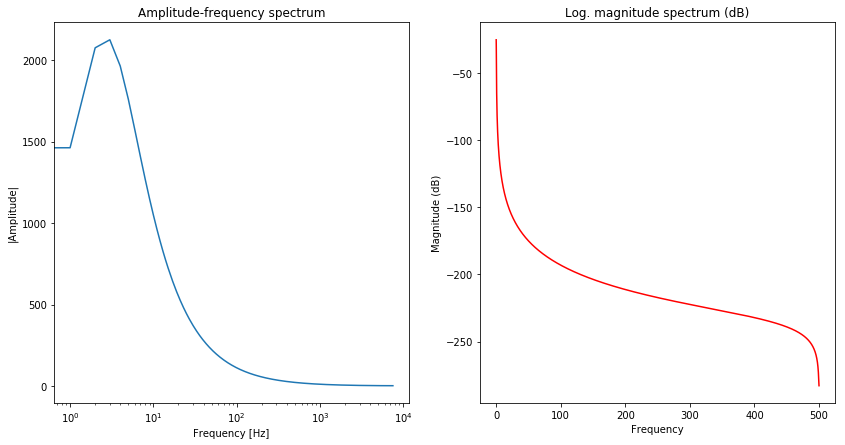

In [142]:
fig_f_1_AS, axes_f_1_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_1_AS[0].plot(spectrum_1)
axes_f_1_AS[0].set_title("Amplitude-frequency spectrum")
axes_f_1_AS[0].set_xlabel("Frequency [Hz]")
axes_f_1_AS[0].set_ylabel("|Amplitude|")
axes_f_1_AS[0].set_xscale("log")

axes_f_1_AS[1].magnitude_spectrum(signal_spectrum_1, Fs=1000, scale="dB", color="red")
axes_f_1_AS[1].set_title("Log. magnitude spectrum (dB)")

plt.show()

#### Function 2

In [47]:
def f_2_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (1/4) ** ((t/SampRate) * i) * np.cos(np.pi * ((t/SampRate) * i) / 4) * u * (((t/SampRate) * i) - 2)
        i += 1
    
    return(signal, time)

In [57]:
u_2_spectrum = np.random.random() * 10
t_2_spectrum = 15

signal_spectrum_2, time_spectrum_2 = f_2_spectrum(u_2_spectrum, t_2_spectrum)

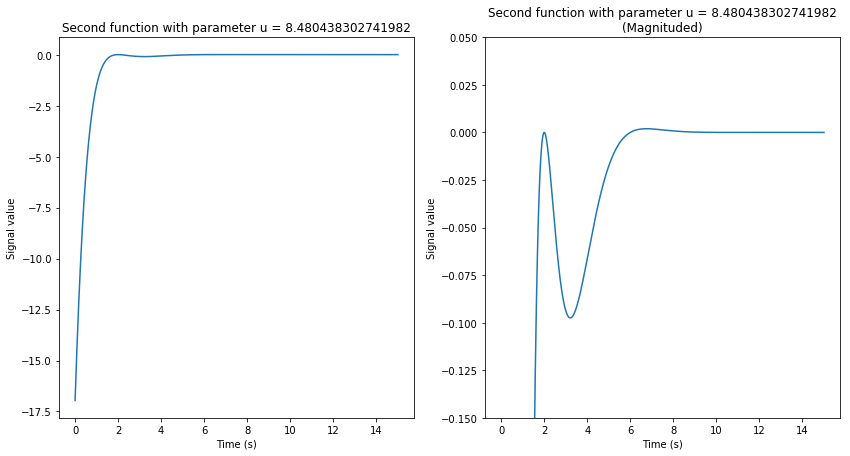

In [137]:
fig_f_2_spectrum, axes_f_2_spectrum = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axes_f_2_spectrum[0].plot(time_spectrum_2, signal_spectrum_2)
axes_f_2_spectrum[0].set_title("Second function with parameter u = " + str(u_2_spectrum))
axes_f_2_spectrum[0].set_xlabel("Time (s)")
axes_f_2_spectrum[0].set_ylabel("Signal value")

axes_f_2_spectrum[1].plot(time_spectrum_2, signal_spectrum_2)
axes_f_2_spectrum[1].set_title("Second function with parameter u = " + str(u_2_spectrum) + "\n(Magnituded)")
axes_f_2_spectrum[1].set_xlabel("Time (s)")
axes_f_2_spectrum[1].set_ylabel("Signal value")
axes_f_2_spectrum[1].set_ylim(-0.15,0.05)

plt.show()

##### Amplitude spectrum

In [102]:
spectrum_2 = abs(np.fft.rfft(signal_spectrum_2))

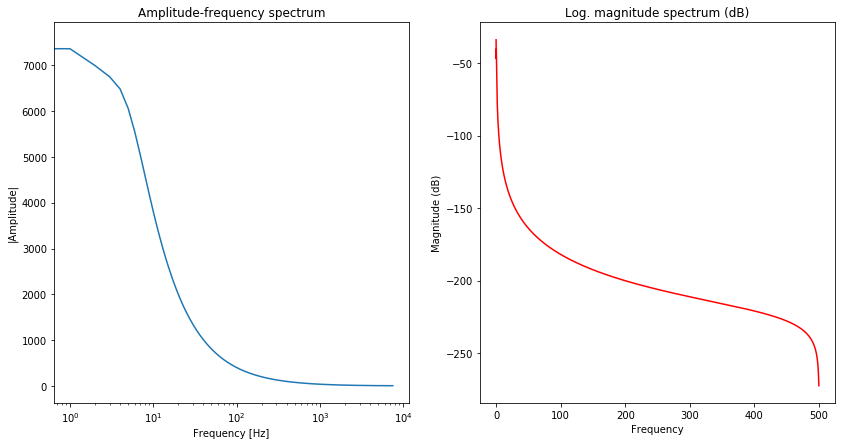

In [141]:
fig_f_2_AS, axes_f_2_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_2_AS[0].plot(spectrum_2)
axes_f_2_AS[0].set_title("Amplitude-frequency spectrum")
axes_f_2_AS[0].set_xlabel("Frequency [Hz]")
axes_f_2_AS[0].set_ylabel("|Amplitude|")
axes_f_2_AS[0].set_xscale("log")

axes_f_2_AS[1].magnitude_spectrum(signal_spectrum_2, Fs=1000, scale="dB", color="red")
axes_f_2_AS[1].set_title("Log. magnitude spectrum (dB)")

plt.show()

#### Function 3

In [69]:
def f_3_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = np.sin(2 * np.pi * ((t/SampRate) * i) / 8) * np.sin(2 * np.pi * (((t/SampRate) * i) - 4) / 8)
        i += 1
    
    return(signal, time)

In [70]:
u_3_spectrum = np.random.random() * 10
t_3_spectrum = 15

signal_spectrum_3, time_spectrum_3 = f_3_spectrum(u_3_spectrum, t_3_spectrum)

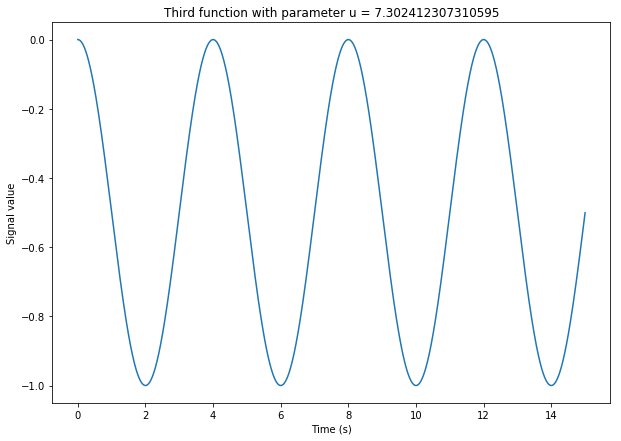

In [73]:
fig_f_3_spectrum = plt.figure(figsize=(10,7))

plt.plot(time_spectrum_3, signal_spectrum_3)

plt.title("Third function with parameter u = " + str(u_3_spectrum))
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.show()

##### Amplitude spectrum

In [100]:
spectrum_3 = abs(np.fft.rfft(signal_spectrum_3))

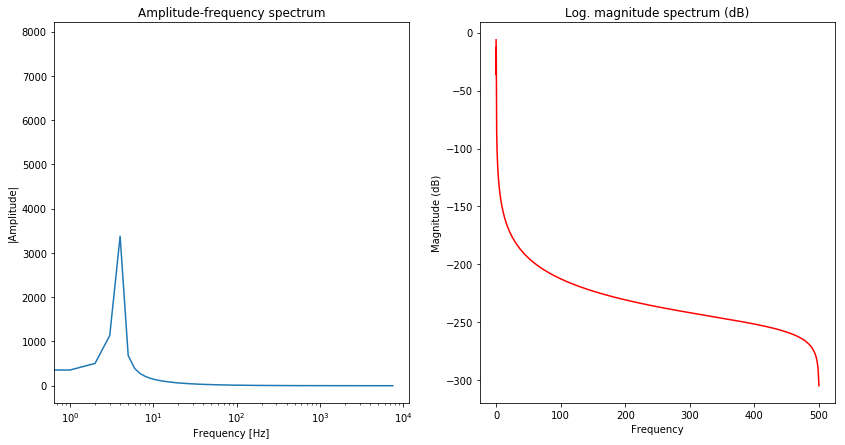

In [140]:
fig_f_3_AS, axes_f_3_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_3_AS[0].plot(spectrum_3)
axes_f_3_AS[0].set_title("Amplitude-frequency spectrum")
axes_f_3_AS[0].set_xlabel("Frequency [Hz]")
axes_f_3_AS[0].set_ylabel("|Amplitude|")
axes_f_3_AS[0].set_xscale("log")

axes_f_3_AS[1].magnitude_spectrum(signal_spectrum_3, Fs=1000, scale="dB", color="red")
axes_f_3_AS[1].set_title("Log. magnitude spectrum (dB)")

plt.show()

##### Phase spectrum

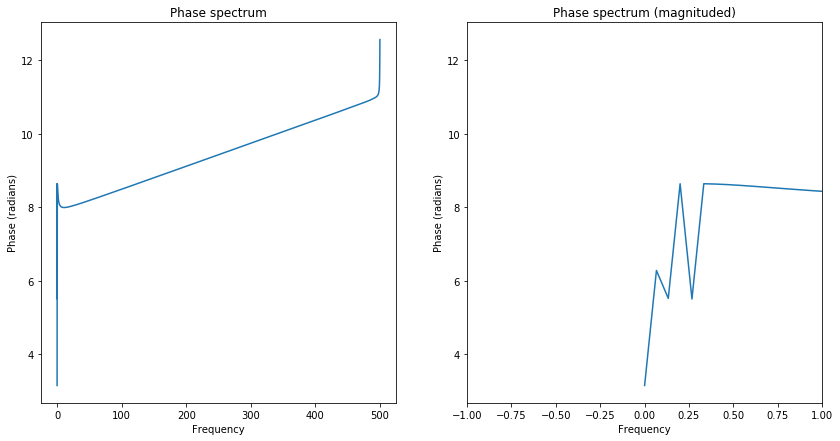

In [133]:
fig_f_3_PS, axes_f_3_PS = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axes_f_3_PS[0].phase_spectrum(signal_spectrum_3, Fs=1000)
axes_f_3_PS[0].set_title("Phase spectrum")

axes_f_3_PS[1].phase_spectrum(signal_spectrum_3, Fs=1000)
axes_f_3_PS[1].set_title("Phase spectrum (magnituded)")
axes_f_3_PS[1].set_xlim(-1,1)

plt.show()

#### Function 4

In [74]:
def f_4_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = np.sin(np.pi * ((t/SampRate) * i) / 10) * (u * ((t/SampRate) * i) - (((t/SampRate) * i) - 10)) 
        i += 1
    
    return(signal, time)

In [80]:
u_4_spectrum = np.random.random() * 10
t_4_spectrum = 150

signal_spectrum_4, time_spectrum_4 = f_4_spectrum(u_4_spectrum, t_4_spectrum)

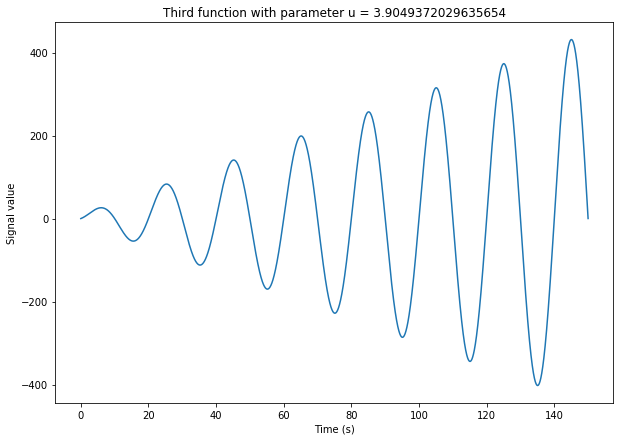

In [81]:
fig_f_4_spectrum = plt.figure(figsize=(10,7))

plt.plot(time_spectrum_4, signal_spectrum_4)

plt.title("Third function with parameter u = " + str(u_4_spectrum))
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.show()

##### Amplitude spectrum

In [98]:
spectrum_4 = abs(np.fft.rfft(signal_spectrum_4))

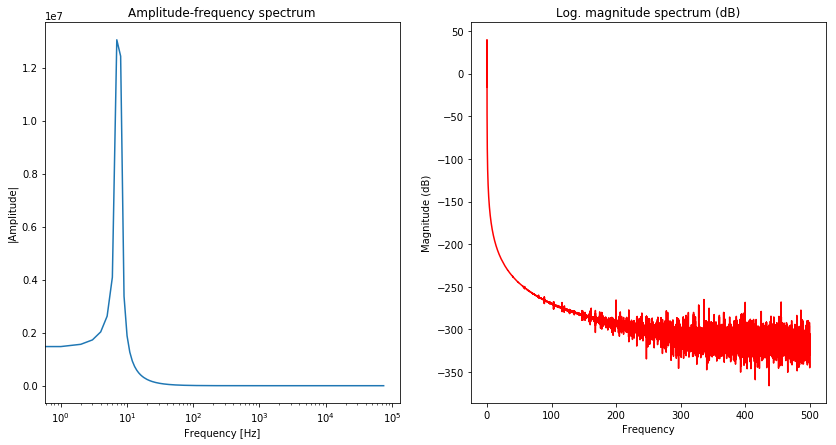

In [139]:
fig_f_4_AS, axes_f_4_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_4_AS[0].plot(spectrum_4)
axes_f_4_AS[0].set_title("Amplitude-frequency spectrum")
axes_f_4_AS[0].set_xlabel("Frequency [Hz]")
axes_f_4_AS[0].set_ylabel("|Amplitude|")
axes_f_4_AS[0].set_xscale("log")

axes_f_4_AS[1].magnitude_spectrum(signal_spectrum_4, Fs=1000, scale="dB", color="red")
axes_f_4_AS[1].set_title("Log. magnitude spectrum (dB)")

plt.show()

##### Phase spectrum

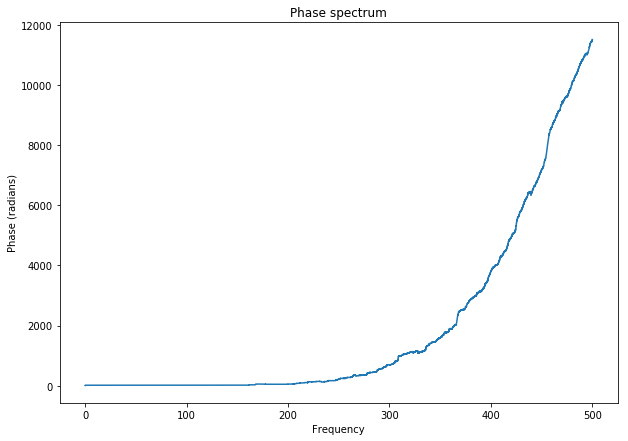

In [125]:
fig_f_4_PS = plt.figure(figsize=(10,7))

plt.phase_spectrum(signal_spectrum_4, Fs=1000)

plt.title("Phase spectrum")

plt.show()

#### Function 5

In [83]:
def f_5_spectrum(u,t):
    
    # Sampling rate: 1000 Hz/second
    SampRate = t * 1000
    time = np.linspace(0, t, SampRate, endpoint=True)
    
    # np.array for containting values of current function
    signal = np.empty(SampRate)
    
    i = 0
    while(i < SampRate):
        signal[i] = (np.sin(np.pi * ((t/SampRate) * i) / 4)) ** 2 
        i += 1
    
    return(signal, time)

In [86]:
u_5_spectrum = np.random.random() * 10
t_5_spectrum = 15

signal_spectrum_5, time_spectrum_5 = f_5_spectrum(u_5_spectrum, t_5_spectrum)

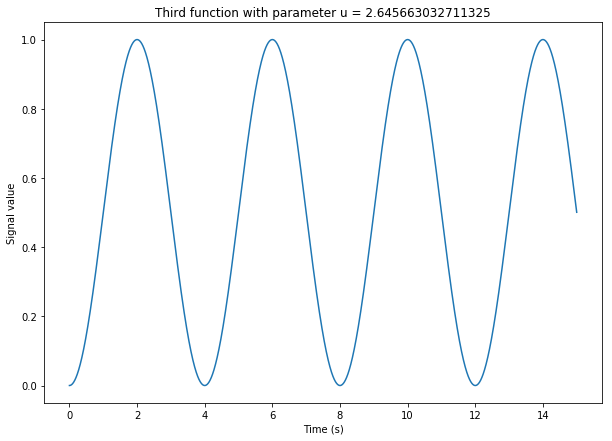

In [87]:
fig_f_5_spectrum = plt.figure(figsize=(10,7))

plt.plot(time_spectrum_5, signal_spectrum_5)

plt.title("Third function with parameter u = " + str(u_5_spectrum))
plt.xlabel("Time (s)")
plt.ylabel("Signal value")

plt.show()

##### Amplitude spectrum

In [95]:
spectrum_5 = abs(np.fft.rfft(signal_spectrum_5))

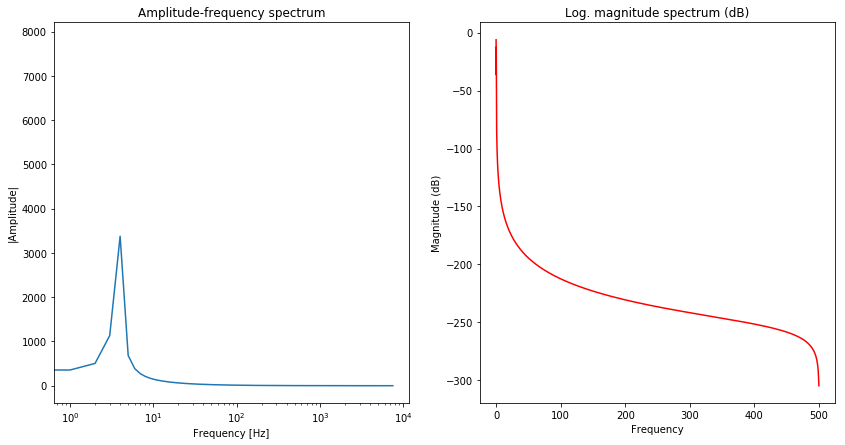

In [143]:
fig_f_5_AS, axes_f_5_AS = plt.subplots(nrows=1, ncols=2, figsize=(14,7))

axes_f_5_AS[0].plot(spectrum_5)
axes_f_5_AS[0].set_title("Amplitude-frequency spectrum")
axes_f_5_AS[0].set_xlabel("Frequency [Hz]")
axes_f_5_AS[0].set_ylabel("|Amplitude|")
axes_f_5_AS[0].set_xscale("log")

axes_f_5_AS[1].magnitude_spectrum(signal_spectrum_5, Fs=1000, scale="dB", color="red")
axes_f_5_AS[1].set_title("Log. magnitude spectrum (dB)")

plt.show()

##### Phase spectrum

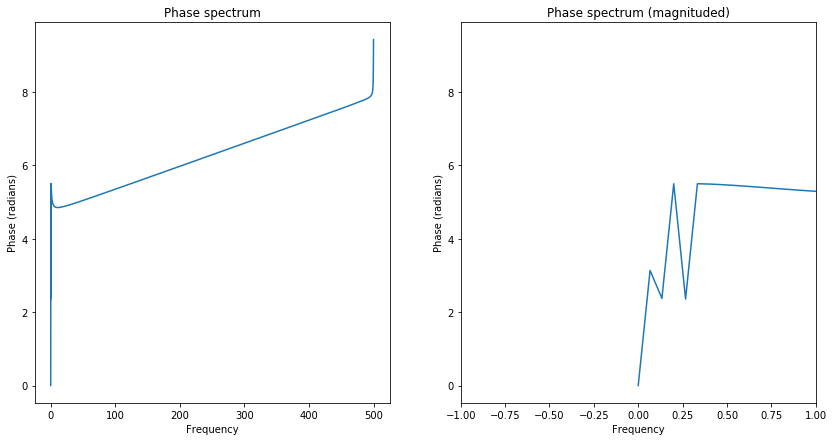

In [138]:
fig_f_5_PS, axes_f_5_PS = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

axes_f_5_PS[0].phase_spectrum(signal_spectrum_5, Fs=1000)
axes_f_5_PS[0].set_title("Phase spectrum")

axes_f_5_PS[1].phase_spectrum(signal_spectrum_5, Fs=1000)
axes_f_5_PS[1].set_title("Phase spectrum (magnituded)")
axes_f_5_PS[1].set_xlim(-1,1)

plt.show()